In [2]:
import os
from fastai.vision.all import *
from fastai.text.all import *
from nbdev.showdoc import *
torch.cuda.set_device(7)
# import timm - Timm doesnt work here

In [5]:
#Sets the path for the data to load
path = Path("data")

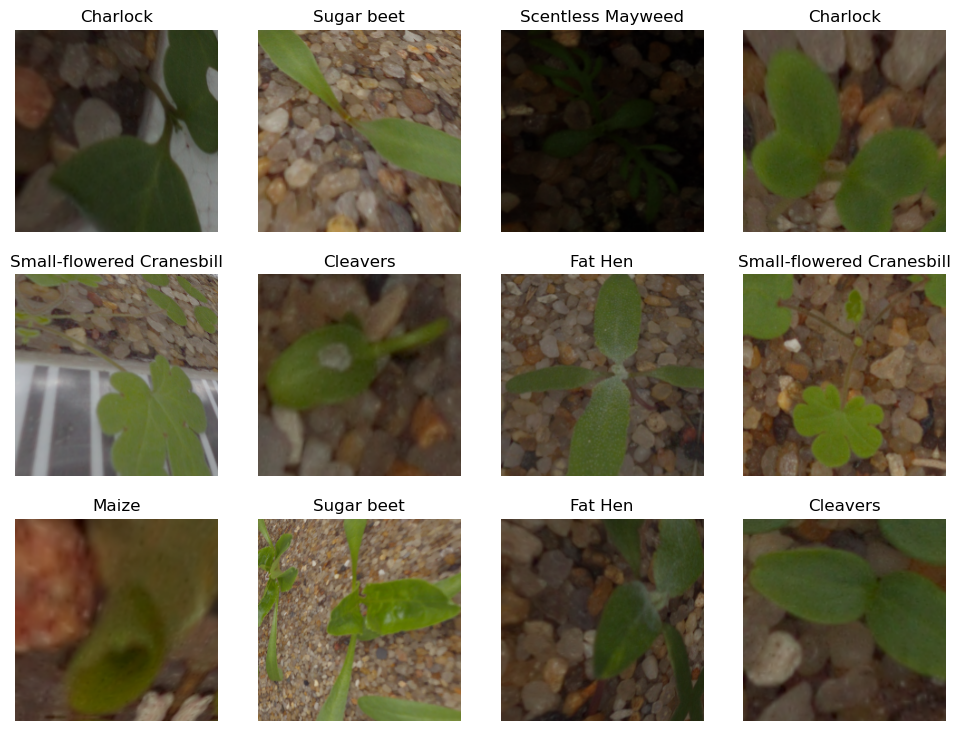

In [17]:
plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms(mult=2) #added batch transforms, used for data augmentation
).dataloaders(path,bs=16)
# Shows the labeled plants
plants.show_batch(max_n=12)

In [18]:
learn = vision_learner(plants,resnet50,metrics=error_rate)
learn.fine_tune(10)

/home/team8/miniconda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/team8/miniconda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /home/team8/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.075274,0.480209,0.158465,00:51


epoch,train_loss,valid_loss,error_rate,time
0,0.390711,0.200297,0.075847,01:07
1,0.453733,0.224270,0.073589,01:07
2,0.359960,0.156307,0.047404,01:06
3,0.294004,0.132074,0.046501,01:06
4,0.245307,0.116200,0.044695,01:07
5,0.170631,0.121023,0.040181,01:06
6,0.116469,0.074386,0.023928,01:07
7,0.085014,0.065690,0.020767,01:06
8,0.071123,0.057366,0.019413,01:06
9,0.055457,0.060355,0.019865,01:06


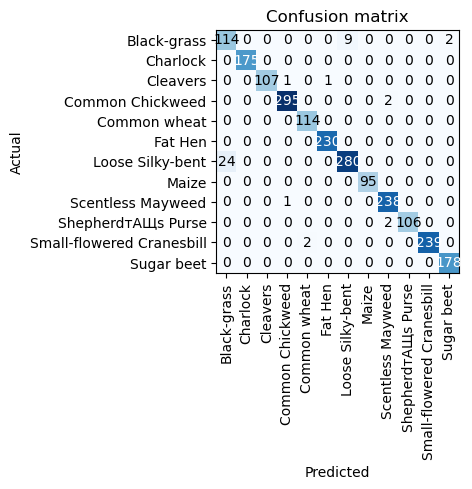

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
interp.most_confused()

[('Loose Silky-bent', 'Black-grass', 24),
 ('Black-grass', 'Loose Silky-bent', 9),
 ('Black-grass', 'Sugar beet', 2),
 ('Common Chickweed', 'Scentless Mayweed', 2),
 ('ShepherdтАЩs Purse', 'Scentless Mayweed', 2),
 ('Small-flowered Cranesbill', 'Common wheat', 2),
 ('Cleavers', 'Common Chickweed', 1),
 ('Cleavers', 'Fat Hen', 1),
 ('Scentless Mayweed', 'Common Chickweed', 1)]

In [24]:
#interp.plot_top_losses(9)
interp.top_losses()

(TensorBase([7.5808, 7.5808, 6.0936,  ..., -0.0000, -0.0000, -0.0000]),
 TensorBase([ 392, 1172, 2062,  ..., 1668,  218,  312]))

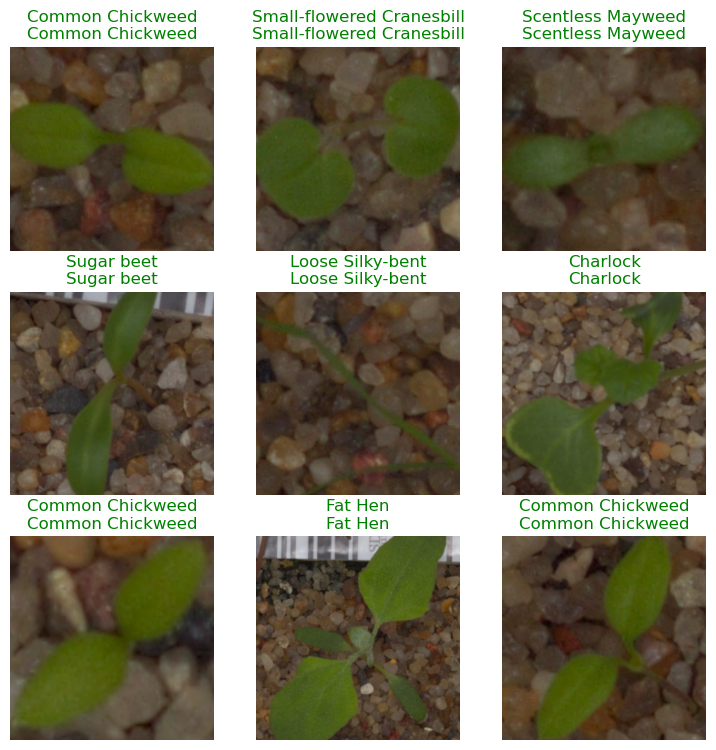

In [27]:
learn.show_results()

In [31]:
learn.recorder.plot_losses()

AttributeError: 'Sequential' object has no attribute 'plot_losses'

SuggestedLRs(valley=6.918309736647643e-06)

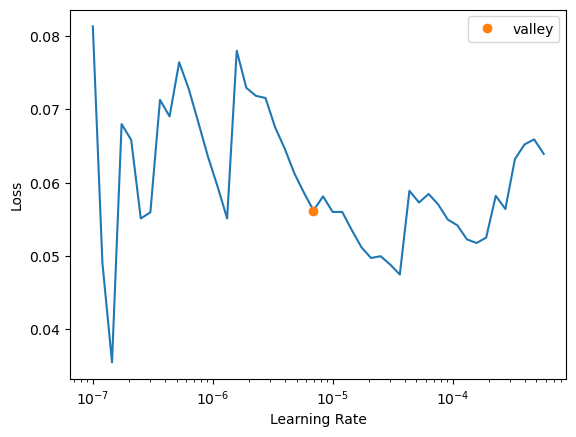

In [53]:
learn.lr_find()

In [62]:
learn = vision_learner(plants,resnet50,metrics=error_rate)
learn.fit_one_cycle(10,6e-6)

epoch,train_loss,valid_loss,error_rate,time
0,3.706845,2.752342,0.864560,00:50
1,3.147570,2.147986,0.713770,00:50
2,2.718198,1.659107,0.535440,00:51
3,2.352176,1.402083,0.455982,00:50
4,2.232001,1.240322,0.400000,00:50
5,2.019489,1.114630,0.368849,00:50
6,1.981342,1.045895,0.338149,00:51
7,1.968083,1.038710,0.345824,00:52
8,1.986565,1.024127,0.335440,00:51
9,1.912673,1.020370,0.325959,00:51


SuggestedLRs(valley=0.00015848931798245758)

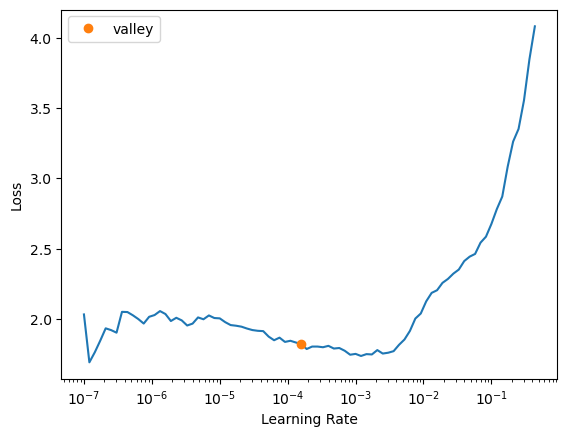

In [64]:
learn.unfreeze()
learn.lr_find()

In [ ]:
#Final learning rate is SuggestedLRs(valley=0.00015848931798245758)

In [65]:
learn.export()

In [68]:
learn_inf = load_learner('export.pkl')
learn_inf.predict('data/Black-grass/113.png')


('Black-grass',
 TensorBase(0),
 TensorBase([6.7101e-01, 1.8352e-02, 1.1652e-03, 1.2878e-04, 5.9617e-02,
             2.9043e-04, 2.0341e-01, 5.9709e-03, 3.9438e-04, 7.8095e-03,
             6.2146e-03, 2.5634e-02]))

In [69]:
learn_inf.dls.vocab

['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat', 'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed', 'ShepherdтАЩs Purse', 'Small-flowered Cranesbill', 'Sugar beet']

In [70]:
learnFinal = vision_learner(plants,resnet50,metrics=error_rate)
learnFinal.fine_tune(10,1.6e-4)

/home/team8/miniconda/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/team8/miniconda/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 